In [ ]:
! pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import autoviz

In [ ]:
od.download("https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction")

Skipping, found downloaded files in "./bank-customer-churn-prediction" (use force=True to force download)


In [ ]:
dataset = pd.read_csv("/content/bank-customer-churn-prediction/Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [ ]:
dataset.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset=dataset.drop(['RowNumber','CustomerId','Surname','Geography'], axis=1)

In [ ]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

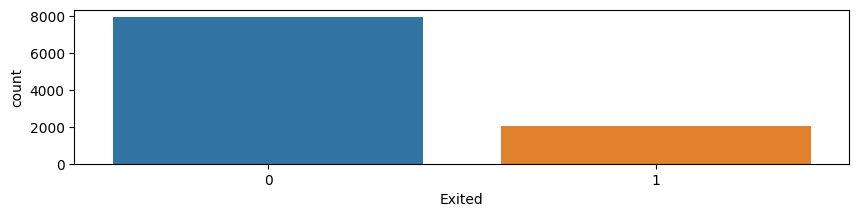

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(dataset,x='Exited')

In [ ]:
dataset['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [ ]:
dataset['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

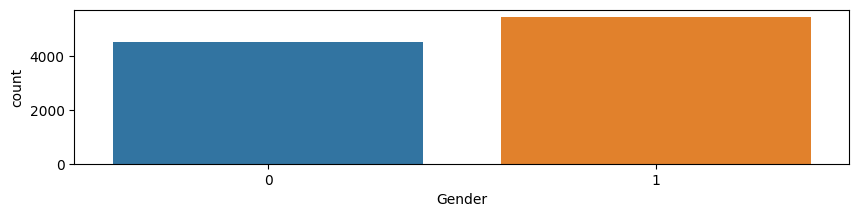

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(dataset,x='Gender')

<Axes: xlabel='Age', ylabel='count'>

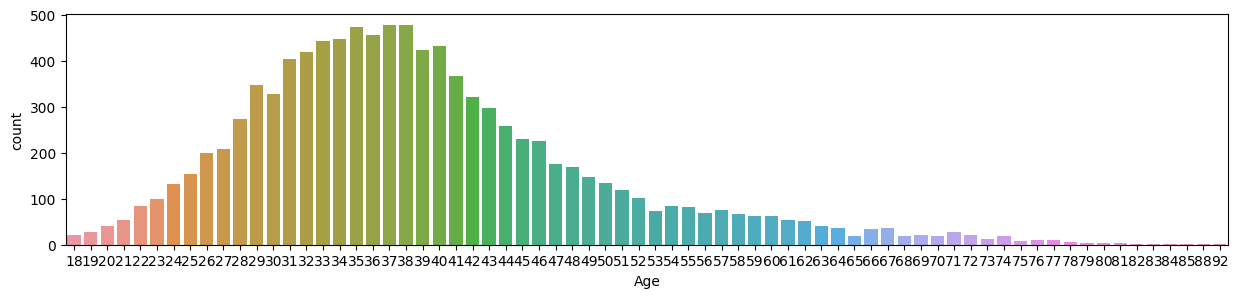

In [ ]:
plt.figure(figsize=(15,3))
sns.countplot(dataset,x='Age')

<Axes: xlabel='Tenure', ylabel='count'>

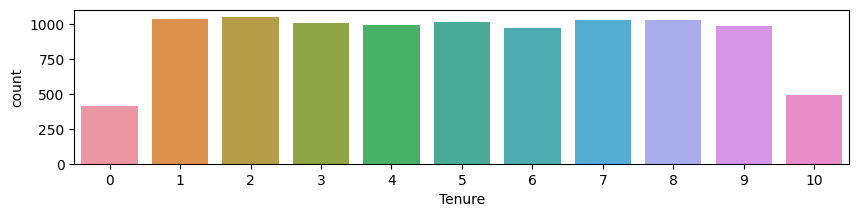

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(dataset,x='Tenure')

In [ ]:
dataset['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<Axes: xlabel='NumOfProducts', ylabel='count'>

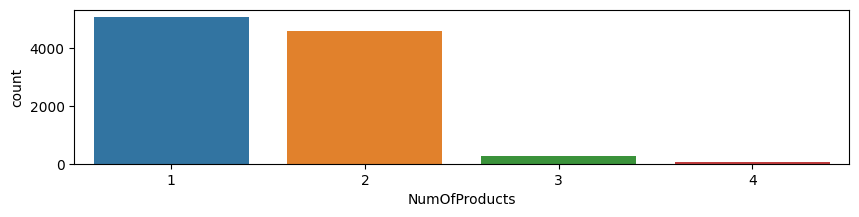

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(dataset,x='NumOfProducts')

Text(0, 0.5, 'Count')

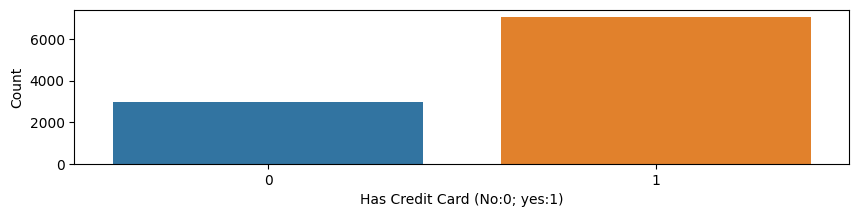

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(dataset,x='HasCrCard')
plt.xlabel('Has Credit Card (No:0; yes:1)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

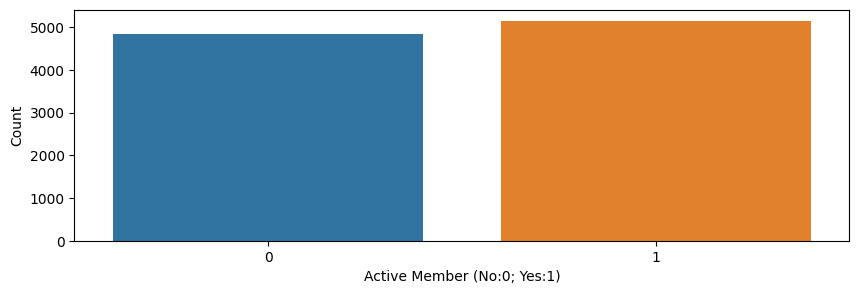

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(dataset,x='IsActiveMember')
plt.xlabel('Active Member (No:0; Yes:1)')
plt.ylabel('Count')

In [ ]:
def value_plot(df, y, figscale=1):
  df[y].plot(kind='line', figsize=(8 * figscale, 2 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['CreditScore'], **{})
chart

In [ ]:
def value_plot(df, y, figscale=1):
  df[y].plot(kind='line', figsize=(8 * figscale, 2 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Balance'], **{})
chart

In [ ]:
def value_plot(df, y, figscale=1):
  df[y].plot(kind='line', figsize=(8 * figscale, 2 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['EstimatedSalary'], **{})
chart

In [ ]:
def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  plt.figure(figsize=(len(colname_pairs) * 2.9 * figscale, 3 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(22 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_49, *[[['CreditScore', 'Age'], ['Age', 'Tenure'], ['Tenure', 'Balance'], ['Balance', 'NumOfProducts']]], **{})
chart

<Axes: >

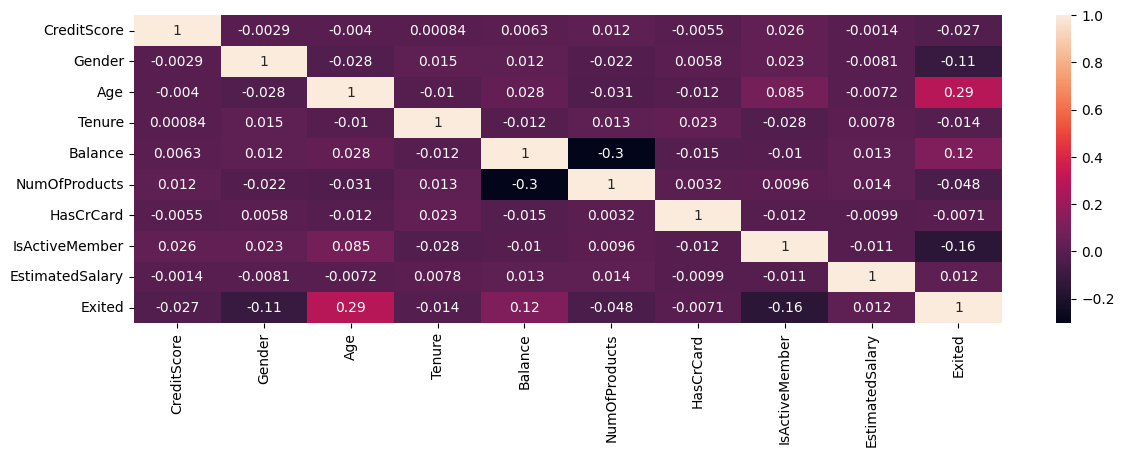

In [ ]:
plt.figure(figsize=(14,4))
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
new_df=dataset.drop(['Exited'], axis=1)

In [ ]:
x = new_df
y = dataset['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 9), (3000, 9), (7000,), (3000,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
feature_importances = rf_classifier.feature_importances_
sorted_idx = feature_importances.argsort()

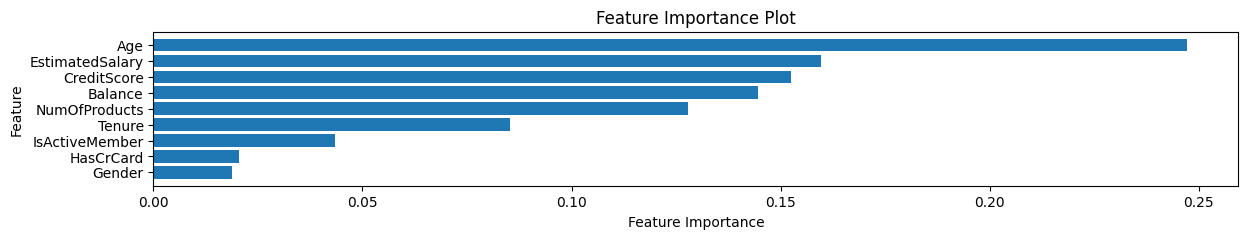

In [ ]:
plt.figure(figsize=(14,2))
plt.barh(range(new_df.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(new_df.shape[1]), new_df.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Random Forest Classifier

In [ ]:
predict=rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2416
           1       0.75      0.43      0.54       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict))

ROC-AUC Score: 0.696450036287762


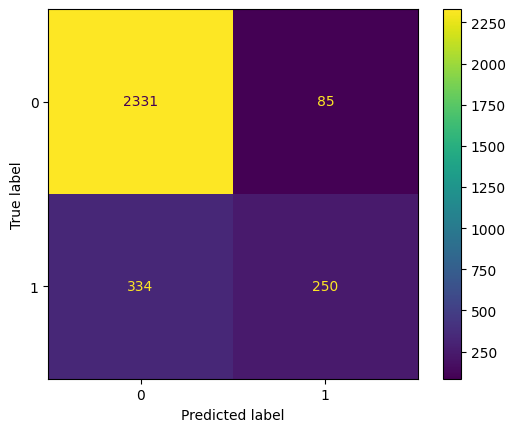

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict))
cmd.plot()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)

In [ ]:
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predict_1=lr_model.predict(x_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_1))

ROC-AUC Score: 0.5282647645831442


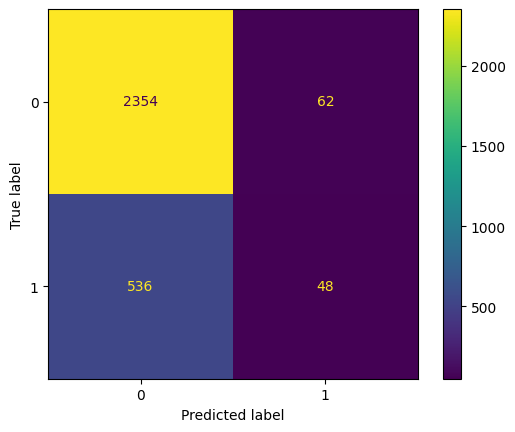

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_1))
cmd.plot()

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [ ]:
clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
predict_2=clf.predict(x_test)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_2))

ROC-AUC Score: 0.7100636169826726


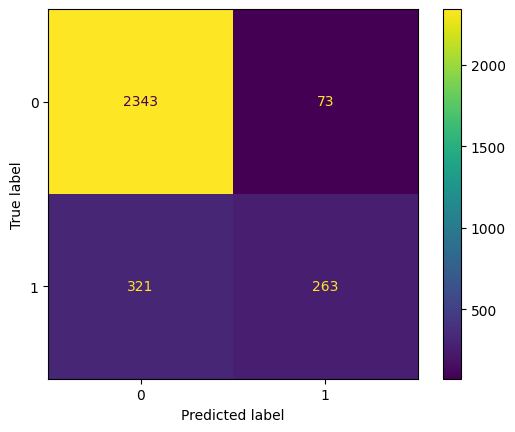

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_2))
cmd.plot()